## 9. Forecasting

**Exercise 9.1**. For an AR(1) model with $Y_t = 12.2$, $\phi = −0.5$, and $\mu = 10.8$,

**(a)** Find $\hat{Y}_t(1)$.

**(b)** Calculate $\hat{Y}_t(2)$ in two different ways.

**(c)** Calculate $\hat{Y}_t(10)$.

**Solution**.

**(a)**  $$\hat{Y}_t(1) = \mu + \phi (Y_t - \mu) = 10.09 $$

**(b)**  Calculating the estimate from the previous estimate,

$$ \hat{Y}_t(2) = \mu + \phi (\hat{Y}_t(1) - \mu) = 11.155 $$

Alternatively, calculating it directly,

$$ \hat{Y}_t(2) = \mu + \phi^2 (Y_t - \mu) = 11.155 $$

**(c)**  Calculating it directly,

$$ \hat{Y}_t(10) = \mu + \phi^{10} (Y_t - \mu) \approx 10.801367 \approx \mu $$

**Exercise 9.2**.  Suppose that annual sales (in millions of dollars) of the Acme Corporation follow the AR(2) model $Y_t = 5  + 1.1 Y_{t-1} - 0.5 Y_{t-2} + e_t$ with $\sigma_e^2 = 2$.

**(a)** If sales for 2005, 2006, and 2007 were \\$9 million, \\$11 million, and \\$10 million, respectively, forecast sales for 2008 and 2009.

**(b)** Show that $\psi_1 = 1.1$ for this model.

**(c)** Calculate 95% prediction limits for your forecast in part (a) for 2008.

**(d)** If sales in 2008 turn out to be \\$12 million, update your forecast for 2009.

**Solution**.

**(a)**  Forecasts are:

$$ \hat{Y}_{2008} = 5 + 1.1 Y_{2007} - 0.5 Y_{2006} = 10.5 $$

and

$$ \hat{Y}_{2009} = 5 + 1.1 \hat{Y}_{2008} - 0.5 Y_{2007} = 11.55 $$

**(b)**  From Equation (4.3.21) for the AR(2) model, $\psi_1 - \phi_1 \psi_0 = 0$ and $\psi_0 = 1$.  For this model, $\phi_1 = 1.1$, so $\psi_1 = 1.1$.

**(c)**   We have:

$$ \text{Var}[e_t(\ell)] = \sigma_e^2 \sum_{j=0}^{\ell-1} \psi_j^2 $$

so, in particular, $\text{Var}[e_t(1)] = \sigma_e^2 = 2$ for the one-lag prediction of 2008.  The prediction bounds are $\pm z_{\alpha / 2} \sigma_e = \pm \Phi(0.975) \sqrt{2} \approx 2.7718$, so a 95% confidence interval would be 

$$ (\hat{Y}_{2008} - z_{\alpha / 2} \sigma_e, \hat{Y}_{2008} - z_{\alpha / 2} \sigma_e ) \approx (7.7282, 13.2718) $$

**(d)**  We can update the forecast according to Equation (9.6.1),

$$ \hat{Y}_{t+1}(\ell) = \hat{Y}_{t}(\ell + 1) + \psi_\ell [Y_{t+1} - \hat{Y}_t(1)] $$

In our case,

$$ \hat{Y}_{2008}(1) = \hat{Y}_{2007}(2) + \psi_1 [Y_{2008} - \hat{Y}_{2007}(1)] = 11.55 + 1.1 \cdot [12 - 10.5] = 13.2 $$

**Exercise 9.3**.  Using the estimated cosine trend on page 192:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.719°F.)

**(c)** What is the forecast for April, 1977? For April 2009?

**Solution**.  The cosine trend is given as

$$ \hat{\mu}_t = 46.2660 + (-26.7079) \cos (2 \pi t) + (-2.1697) \sin (2 \pi t) $$

where time $t$ is measured in years, with $t = 0$ for January 1964, frequency $f = 1$ per year, and the final observed value is for December 1975.

**(a)**  There are 12 years and 3 months from Jan 1964 until Apr 1976; so we can use $t = 12 + 3/12$.

In [1]:
import numpy as np

def mu_t(t):
    return 46.2660 + (-26.7079) * np.cos(2 * np.pi * t) + (-2.1697) * np.sin(2 * np.pi * t)

def farenheit_to_celsius(t_f):
    return (t_f - 32) * 5 / 9

def temperature_to_string(t_f):
    return str(round(t_f, 1)) + '°F or ' + str(round(farenheit_to_celsius(t_f), 1)) + '°C'

t = 12 + 3/12
estimate = mu_t(t)
print(temperature_to_string(estimate))

44.1°F or 6.7°C


The forecast is 44.1°F or 6.7°C.

**(b)**  The 95% prediction limits are $\hat{\mu}_t \pm z_{\alpha/2} \sqrt{\gamma_0} $

In [2]:
from scipy.stats import norm

z = norm.ppf(0.975)
se = 3.719

estimate = mu_t(t)
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print('Lower estimate: ' + temperature_to_string(lower_estimate))
print('Upper estimate: ' + temperature_to_string(upper_estimate))

Lower estimate: 36.8°F or 2.7°C
Upper estimate: 51.4°F or 10.8°C


The 95\% confidence interval is from 36.8°F to 51.4°F, or 2.7°C to 10.8°C.

**(c)**  All forecasts for April are the same, 44.1°F or 6.7°C.

**Exercise 9.4**.  Using the estimated cosine trend on page 192:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for May 1976.

**(b)** Find a 95% prediction interval for that May 1976 forecast. (The estimate of for this model is 3.719°F.)

**Solution**.

**(a)**

In [3]:
t = 12 + 4/12
estimate = mu_t(t)
print(temperature_to_string(estimate))

57.7°F or 14.3°C


The forecast temperature is 57.7°F or 14.3°C.

**(b)**

In [4]:
z = norm.ppf(0.975)
se = 3.719

estimate = mu_t(t)
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print('Lower estimate: ' + temperature_to_string(lower_estimate))
print('Upper estimate: ' + temperature_to_string(upper_estimate))

Lower estimate: 50.5°F or 10.3°C
Upper estimate: 65.0°F or 18.4°C


The 95\% confidence interval is from 50.5°F to 65.5°F, or 10.3°C to 18.4°C.

**Exercise 9.5**.  Using the seasonal means model without an intercept shown in Exhibit 3.3 on page 32:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April, 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**(c)** Compare your forecast with the one obtained in Exercise 9.3.

**(d)** What is the forecast for April 1977? April 2009?

**Solution**.  The model is:

$$
\begin{array}{lcccc}
 & \text{Estimate} & \text{Std. Error} & t\text{-value} & \text{Pr}[>|t|] \\
\hline
\text{January}   & 16.608 & 0.987 & 16.8 & < 0.0001 \\
\text{February}  & 20.650 & 0.987 & 20.9 & < 0.0001 \\
\text{March}     & 32.475 & 0.987 & 32.9 & < 0.0001 \\
\text{April}     & 46.525 & 0.987 & 47.1 & < 0.0001 \\
\text{May}       & 58.092 & 0.987 & 58.9 & < 0.0001 \\
\text{June}      & 67.500 & 0.987 & 68.4 & < 0.0001 \\
\text{July}      & 71.717 & 0.987 & 72.7 & < 0.0001 \\
\text{August}    & 69.333 & 0.987 & 70.2 & < 0.0001 \\
\text{September} & 61.025 & 0.987 & 61.8 & < 0.0001 \\
\text{October}   & 50.975 & 0.987 & 51.6 & < 0.0001 \\
\text{November}  & 36.650 & 0.987 & 37.1 & < 0.0001 \\
\text{December}  & 23.642 & 0.987 & 24.0 & < 0.0001
\end{array}
$$

**(a)**

In [5]:
temperature_to_string(46.525)

'46.5°F or 8.1°C'

The estimate for April is just the coefficient for April, 46.5°F or 8.1°C.

**(b)**

In [6]:
z = norm.ppf(0.975)
se = 3.419

estimate = 46.525
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print('Lower estimate: ' + temperature_to_string(lower_estimate))
print('Upper estimate: ' + temperature_to_string(upper_estimate))

Lower estimate: 39.8°F or 4.3°C
Upper estimate: 53.2°F or 11.8°C


The 95\% prediction interval for the April forecast is 39.8°F to 53.2°F, or 4.3°C to 11.8°C.

**(c)**  This model predicts a slightly higher temperature, with a slightly smaller prediction interval.

**(d)** Forecast for all April months are the same: 46.5°F or 8.1°C.

**Exercise 9.6**.  Using the seasonal means model with an intercept shown in Exhibit 3.4 on page 33:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**(c)** Compare your forecast with the one obtained in Exercise 9.5.

**Solution**.  The model is:

$$
\begin{array}{lcccc}
 & \text{Estimate} & \text{Std. Error} & t\text{-value} & \text{Pr}[>|t|] \\
\hline
\text{Intercept} & 16.608 & 0.987 & 16.83 & < 0.0001 \\
\text{February}  &  4.042 & 1.396 &  2.90 &  0.00443 \\
\text{March}     & 15.867 & 1.396 & 11.37 & < 0.0001 \\
\text{April}     & 29.917 & 1.396 & 21.43 & < 0.0001 \\
\text{May}       & 41.483 & 1.396 & 29.72 & < 0.0001 \\
\text{June}      & 50.892 & 1.396 & 36.46 & < 0.0001 \\
\text{July}      & 55.108 & 1.396 & 39.48 & < 0.0001 \\
\text{August}    & 52.725 & 1.396 & 37.78 & < 0.0001 \\
\text{September} & 44.417 & 1.396 & 31.82 & < 0.0001 \\
\text{October}   & 34.367 & 1.396 & 24.62 & < 0.0001 \\
\text{November}  & 20.042 & 1.396 & 14.36 & < 0.0001 \\
\text{December}  &  7.033 & 1.396 &  5.04 & < 0.0001
\end{array}
$$

**(a)**

In [7]:
temperature_to_string(16.608 + 29.917)

'46.5°F or 8.1°C'

The estimate for April is 46.5°F or 8.1°C.

**(b)**

In [8]:
z = norm.ppf(0.975)
se = 3.419

estimate = 16.608 + 29.917
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print('Lower estimate: ' + temperature_to_string(lower_estimate))
print('Upper estimate: ' + temperature_to_string(upper_estimate))

Lower estimate: 39.8°F or 4.3°C
Upper estimate: 53.2°F or 11.8°C


The 95% prediction interval for the April forecast is 39.8°F to 53.2°F, or 4.3°C to 11.8°C.

**(c)**  The forecasts between the two models are always identical.

**Exercise 9.7**.  Using the seasonal means model with an intercept shown in Exhibit 3.4 on page 33

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for January 1976.

**(b)** Find a 95% prediction interval for that January forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**Solution**.

**(a)**

In [9]:
temperature_to_string(16.608)

'16.6°F or -8.6°C'

The estimate for January is 16.6°F or -8.6°C.

**(b)**

In [10]:
z = norm.ppf(0.975)
se = 3.419

estimate = 16.608
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print('Lower estimate: ' + temperature_to_string(lower_estimate))
print('Upper estimate: ' + temperature_to_string(upper_estimate))

Lower estimate: 9.9°F or -12.3°C
Upper estimate: 23.3°F or -4.8°C


The 95% prediction interval for the January forecast is 9.9°F to 23.3°F, or -12.3°C to -4.8°C.

**Exercise 9.8**.  Consider the monthly electricity generation time series shown in Exhibit 5.8 on page 99. The data are in the file named `electricity`.

**(a)** Fit a deterministic trend model containing seasonal means together with a linear time trend to the logarithms of the electricity values.

**(b)** Plot the last five years of the series together with two years of forecasts and the 95% forecast limits. Interpret the plot.

**Solution**.

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv('../data/electricity.dat')
data['date'] = pd.date_range('1973-01', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month

In [13]:
from statsmodels.formula.api import ols

In [14]:
model = ols("np.log(electricity) ~ t + C(month)", data=data).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(electricity)   R-squared:                       0.975
Model:                             OLS   Adj. R-squared:                  0.975
Method:                  Least Squares   F-statistic:                     1262.
Date:                 Wed, 13 May 2020   Prob (F-statistic):          2.63e-299
Time:                         22:20:11   Log-Likelihood:                 711.56
No. Observations:                  396   AIC:                            -1397.
Df Residuals:                      383   BIC:                            -1345.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -37.8299      0.4

**(b)**

In [15]:
sigma_e = np.sqrt(model.scale)
z = norm.ppf(0.975)

In [16]:
new_data = pd.DataFrame()
new_data['date'] = pd.date_range('2006-01', periods=12*2, freq='M')
new_data['t'] = new_data['date'].dt.year + (new_data['date'].dt.month - 1) / 12
new_data['month'] = new_data['date'].dt.month

new_data['electricity'] = np.exp(model.predict(new_data))

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

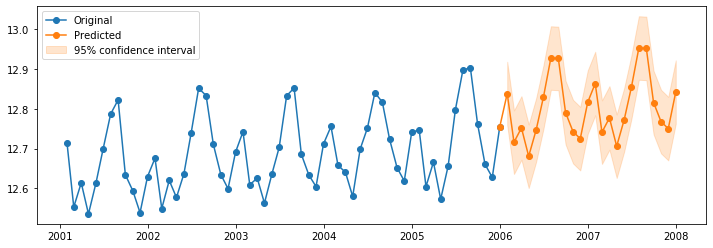

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(
    data[data['t'] >= 2001]['date'], np.log(data[data['t'] >= 2001]['electricity']), 
    marker='o', color='C0', label='Original'
)

# Prepend last element so line is continuous
plot_data = pd.concat([data.tail(1), new_data])

plt.plot(
    plot_data['date'], np.log(plot_data['electricity']), 
    marker='o', color='C1', label='Predicted'
)
plt.fill_between(
    new_data['date'], 
    np.log(new_data['electricity']) - z * sigma_e, 
    np.log(new_data['electricity']) + z * sigma_e,
    color='C1',
    alpha=0.2,
    label='95% confidence interval'
)

plt.legend(loc='upper left')
plt.show()

The forecast seems to follow the seasonality and trend of the series well, with a tight confidence interval.

**Exercise 9.9**.  Simulate an AR(1) process with $\phi = 0.8$ and $\mu = 100$. Simulate 48 values but set aside the last 8 values to compare forecasts to actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$ and $\mu$.

**(b)** Using the estimated model, forecast the next eight values of the series.  Plot the series together with the eight forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the eight forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and the same sample size.

**Solution**.

In [19]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [20]:
def generate_arima(phi=[], d=0, theta=[], n=100):
    """
    Generates an ARIMA distribution with specified phi, d, and theta parameters.
    """
    
    ar = np.r_[1, -np.array(phi)]
    ma = np.r_[1, -np.array(theta)]
    Y = ArmaProcess(ar, ma).generate_sample(nsample=n)
    for i in range(d):
        Y = np.cumsum(Y)
    return Y

In [21]:
np.random.seed(2000)
Y = generate_arima(phi=0.8, n=48) + 100

**(a)**

In [22]:
model = ARIMA(Y[:40], order=(1, 0, 0)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                 -61.783
Method:                           mle   S.D. of innovations              1.127
Date:                Wed, 13 May 2020   AIC                            129.567
Time:                        22:20:12   BIC                            134.633
Sample:                             0   HQIC                           131.399
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.2652      0.438    226.386      0.000      98.406     100.125
ar.L1.y        0.6060      0.129      4.700      0.000       0.353       0.859
                                    Roots           

**(b)**

In [23]:
Y_pred, se, _ = model.forecast(steps=8)

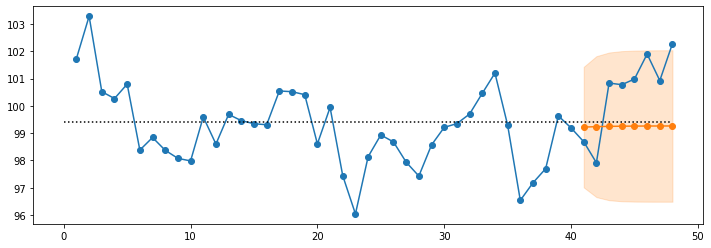

In [24]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y)+1), Y, marker='o', color='C0')
plt.plot(np.arange(41, 49), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(41, 49), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, 48], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)**  Actual values are almost all still within the 95% confidence interval.

**(d)**  See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                 -57.219
Method:                           mle   S.D. of innovations              1.005
Date:                Wed, 13 May 2020   AIC                            120.439
Time:                        22:20:13   BIC                            125.506
Sample:                             0   HQIC                           122.271
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0090      0.414    241.391      0.000      99.197     100.821
ar.L1.y        0.6318      0.122      5.165      0.000       0.392       0.872
                                    Roots           

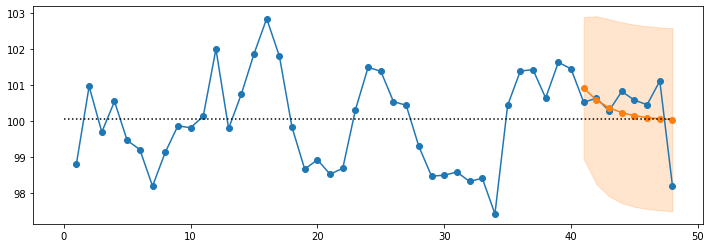

In [25]:
np.random.seed(2001)
Y = generate_arima(phi=0.8, n=48) + 100
model = ARIMA(Y[:40], order=(1, 0, 0)).fit(method='mle')
print(model.summary())
Y_pred, se, _ = model.forecast(steps=8)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y)+1), Y, marker='o', color='C0')
plt.plot(np.arange(41, 49), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(41, 49), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, 48], [process_mean, process_mean], ls=':', color='black')
plt.show()

Results are again within the 95% confidence interval.

**Exercise 9.10**.  Simulate an AR(2) process with $\phi_1 = 1.5$, $\phi_2 = −0.75$, and $\mu = 100$.  Simulate 52 values but set aside the last 12 values to compare forecasts to actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of the $\phi$'s and $\mu$.

**(b)** Using the estimated model, forecast the next 12 values of the series.  Plot the series together with the 12 forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the 12 forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [26]:
np.random.seed(2000)
Y = generate_arima(phi=[1.5, -0.75], n=52) + 100

**(a)**

In [27]:
model = ARIMA(Y[:40], order=(2, 0, 0)).fit(method='mle')
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(2, 0)   Log Likelihood                 -62.484
Method:                           mle   S.D. of innovations              1.114
Date:                Wed, 13 May 2020   AIC                            132.968
Time:                        22:20:14   BIC                            139.724
Sample:                             0   HQIC                           135.411
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.0537      0.546    181.391      0.000      97.983     100.124
ar.L1.y        1.4383      0.104     13.877      0.000       1.235       1.641
ar.L2.y       -0.7633      0.106     -7.200      0.0

**(b)**

In [28]:
Y_pred, se, _ = model.forecast(steps=12)

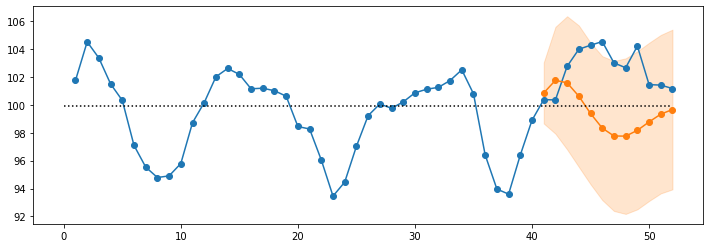

In [29]:
process_mean = np.mean(Y)
z = norm.ppf(0.975)

plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y)+1), Y, marker='o', color='C0')
plt.plot(np.arange(41, 53), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(41, 53), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, 52], [process_mean, process_mean], ls=':', color='black')
plt.show()

**(c)** A few of the points are away from the confidence interval region.

**(d)** See (b).

**(e)**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   40
Model:                     ARMA(2, 0)   Log Likelihood                 -56.626
Method:                           mle   S.D. of innovations              0.951
Date:                Wed, 13 May 2020   AIC                            121.252
Time:                        22:20:15   BIC                            128.007
Sample:                             0   HQIC                           123.694
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9954      0.528    189.537      0.000      98.961     101.029
ar.L1.y        1.5550      0.077     20.308      0.000       1.405       1.705
ar.L2.y       -0.8442      0.076    -11.165      0.0

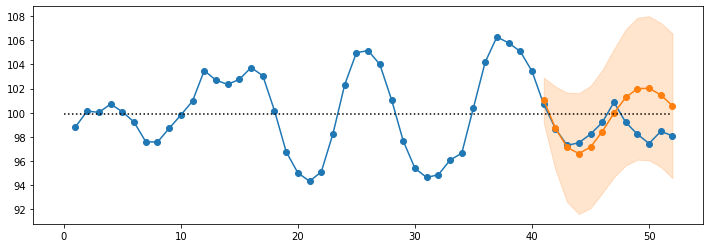

In [30]:
np.random.seed(2001)
Y = generate_arima(phi=[1.5, -0.75], n=52) + 100

model = ARIMA(Y[:40], order=(2, 0, 0)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=12)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

plt.figure(figsize=(12, 4))
plt.plot(np.arange(1, len(Y)+1), Y, marker='o', color='C0')
plt.plot(np.arange(41, 53), Y_pred, marker='o', color='C1')
plt.fill_between(np.arange(41, 53), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, 52], [process_mean, process_mean], ls=':', color='black')
plt.show()

The actual values are now all within the confidence interval.